<a href="https://colab.research.google.com/github/RayaSatriatama/E-Commerce_Public_Data_Analysis_Project/blob/main/Data_Analysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Brazilian E-Commerce Public Dataset
- **Nama:** Mohammad Raya Satriatama
- **Email:** rayasatriatama10@gmail.com
- **ID Dicoding:** raya_satriatama

## 1. Menentukan Pertanyaan Bisnis

### 1.1 Tentang Dataset
Dataset Publik E-Commerce Brasil oleh Olist
Selamat datang! Ini adalah dataset publik e-commerce Brazil dari pesanan yang dibuat di Olist Store. Dataset ini memiliki informasi dari 100 ribu pesanan dari tahun 2016 hingga 2018 yang dibuat di beberapa pasar di Brazil. Fitur-fiturnya memungkinkan untuk melihat pesanan dari berbagai dimensi: mulai dari status pesanan, harga, pembayaran, dan kinerja pengiriman hingga lokasi pelanggan, atribut produk, dan akhirnya ulasan yang ditulis oleh pelanggan. Kami juga merilis set data geolokasi yang menghubungkan kode pos Brasil dengan koordinat lat/lng.

Ini adalah data komersial yang nyata, telah dianonimkan, dan referensi ke perusahaan dan mitra dalam teks ulasan telah diganti dengan nama-nama rumah besar Game of Thrones.

Dataset ini disediakan oleh Olist, toko serba ada terbesar di pasar Brazil. Olist menghubungkan bisnis kecil dari seluruh Brazil ke berbagai saluran tanpa kerumitan dan dengan satu kontrak. Para pedagang tersebut dapat menjual produk mereka melalui Olist Store dan mengirimkannya langsung ke pelanggan menggunakan mitra logistik Olist. Lihat lebih lanjut di situs web kami: www.olist.com

Setelah pelanggan membeli produk dari Olist Store, penjual akan diberi tahu untuk memenuhi pesanan tersebut. Setelah pelanggan menerima produk, atau perkiraan tanggal pengiriman, pelanggan akan mendapatkan survei kepuasan melalui email di mana ia dapat memberikan catatan untuk pengalaman pembelian dan menuliskan beberapa komentar.

### 1.2 Pertanyaan Bisnis
Berdasarkan hasil investigasi dan rumusan masalah maka dapat didefinisikan pertanyaan bisnis sebagai berikut:
1. Berapa lama rata-rata waktu pengiriman produk kepada pelanggan di seluruh Brazil?
2. Kapan terakhir kali pelanggan melakukan pembelian di Olist dalam satu tahun terakhir?
3. Seberapa sering pelanggan membeli produk dalam tiga bulan terakhir?
4. Berapa rata-rata pengeluaran pelanggan selama satu tahun terakhir?
5. Di wilayah mana saja pelanggan Olist paling banyak berbelanja?
6. Bagaimana pelanggan Olist dapat dikelompokkan berdasarkan jumlah pembelian dalam setahun?

## 2. Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import babel
import os
from datetime import datetime, timedelta

## 3. Data Wrangling

### 3.1 Gathering Data

In [2]:
# Path dataset
folder_path = "data"

# Persiapan dictionary
all_data = {}

# Copy kedalam dictionary
for file_name in os.listdir(folder_path):
    file_path = os.path.join(folder_path, file_name)

    if file_name.endswith('.csv'):
        df = pd.read_csv(file_path)
        
        key_name = os.path.splitext(file_name)[0]
        all_data[key_name] = df

In [3]:
# Print nama data dan isi data
print(all_data.keys())
print(all_data.values())

dict_keys(['olist_customers_dataset', 'olist_geolocation_dataset', 'olist_orders_dataset', 'olist_order_items_dataset', 'olist_order_payments_dataset', 'olist_order_reviews_dataset', 'olist_products_dataset', 'olist_sellers_dataset', 'product_category_name_translation'])
dict_values([                            customer_id                customer_unique_id  \
0      06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1      18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2      4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3      b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4      4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
...                                 ...                               ...   
99436  17ddf5dd5d51696bb3d7c6291687be6f  1a29b476fee25c95fbafc67c5ac95cf8   
99437  e7b71a9017aa05c9a7fd292d714858e8  d52a67c98be1cf6a5c84435bd38d095d   
99438  5e28dfe12db7fb5

In [4]:
# print DataFrames
for key, df in all_data.items():
    print(f"\033[1mDataset: {key}\033[0m")
    print(df.head())
    print()

Dataset: olist_customers_dataset
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Dataset: olist_geolocation_dataset
   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0               

**Insight:**
- customer_zip_code_prefix dapat dihubungkan dengan data geolocation untuk memahami di mana pelanggan berada, membantu dalam analisis wilayah pemasaran.
- customer_city dan customer_state memungkinkan kita melihat kota dan negara bagian mana yang memiliki pelanggan paling banyak, penting untuk target pemasaran spesifik.

**Insight:**

1. **Customers**
- **customer_zip_code_prefix** dapat dihubungkan dengan data geolocation untuk memahami di mana pelanggan berada, membantu dalam analisis wilayah pemasaran.
- **customer_city** dan **customer_state** memungkinkan kita melihat kota dan negara bagian mana yang memiliki pelanggan paling banyak, penting untuk target pemasaran spesifik.

2. **Geolocation**
- **geolocation_zip_code_prefix** menyediakan informasi kode pos untuk setiap pelanggan atau penjual, yang dapat dipetakan secara geografis.
- **geolocation_city** menunjukkan lokasi dengan konsentrasi pelanggan tinggi, membantu kita memahami lokasi yang berpotensi meningkatkan penjualan.

3. **Order Items**
- Data **order_id** dan **order_item_id** mengindikasikan bahwa satu pesanan dapat memiliki lebih dari satu item, memberikan wawasan tentang preferensi pelanggan untuk pembelian dalam jumlah banyak.
- **price** dan **freight_value** digunakan untuk menghitung total pengeluaran pelanggan, penting dalam analisis Monetary dari RFM.

4. **Order Payments**
- **payment_type** menunjukkan preferensi metode pembayaran, apakah pelanggan lebih sering menggunakan kartu kredit, debit, atau metode lain.
- **payment_installments** dan **payment_value** membantu memahami kecenderungan pelanggan dalam menggunakan cicilan dan seberapa besar total transaksi mereka.

5. **Order Reviews**
- **review_score** mencerminkan kepuasan pelanggan terhadap produk atau pengalaman layanan, sehingga dapat dihubungkan dengan performa penjual atau kualitas produk.
- **review_comment_message** memberikan konteks mengenai ulasan pelanggan yang dapat digunakan dalam analisis sentimen untuk mengidentifikasi area perbaikan.

6. **Orders**
- **order_status** membantu kita memisahkan pesanan yang berhasil, dibatalkan, atau masih dalam proses, yang penting dalam memantau keberhasilan pengiriman.
- **order_purchase_timestamp** dan **order_delivered_customer_date** memungkinkan kita menghitung durasi waktu pengiriman, memberikan wawasan tentang efisiensi logistik dan performa pengiriman.

7. **Products**
- **product_category_name** memberikan kategori produk yang bisa digunakan untuk mengidentifikasi kategori terpopuler di pasar.
- Informasi mengenai **product_weight_g** dan dimensi produk dapat membantu menganalisis pengaruh berat atau ukuran terhadap biaya pengiriman dan tingkat kepuasan pelanggan.

8. **Sellers**
- **seller_zip_code_prefix** memungkinkan kita mengidentifikasi distribusi geografis penjual, membantu dalam menentukan wilayah yang mendominasi penjualan.
- **seller_city** dapat memberikan wawasan lebih lanjut tentang di mana penjual aktif berada, yang membantu untuk melihat jika ada pola tertentu terkait performa penjualan berdasarkan lokasi penjual.

9. **Product Category Translation**
- **product_category_name_english** memberikan terjemahan nama kategori produk ke bahasa Inggris, membuat analisis lebih mudah untuk pengguna internasional.
- Menghubungkan kategori produk ini dengan data penjualan akan membantu melihat produk mana yang paling menarik bagi pelanggan.

### 3.2 Assessing Data

#### 3.2.1 DataFrame Information

In [5]:
for key, df in all_data.items():
    print(f"\033[1mDataset: {key}\033[0m")
    
    # Print DataFrame information
    print("\033[1mInfo:\033[0m")
    df.info()
    print('-' * 50)
    print()

Dataset: olist_customers_dataset
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
--------------------------------------------------

Dataset: olist_geolocation_dataset
Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              100016

#### 3.2.2 Duplicated Rows/Data

In [6]:
for key, df in all_data.items():
    print(f"\033[1mDataset: {key}\033[0m")
    
    # Calculate and print the number of duplicate rows
    duplicates_count = df.duplicated().sum()
    print("\033[1mJumlah duplikasi:\033[0m", duplicates_count)
    print('-' * 50)
    print()

Dataset: olist_customers_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_geolocation_dataset
Jumlah duplikasi: 261831
--------------------------------------------------

Dataset: olist_orders_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_order_items_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_order_payments_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_order_reviews_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_products_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: olist_sellers_dataset
Jumlah duplikasi: 0
--------------------------------------------------

Dataset: product_category_name_translation
Jumlah duplikasi: 0
--------------------------------------------------



#### 3.2.3 Missing Values

In [7]:
for key, df in all_data.items():
    print(f"\033[1mDataset: {key}\033[0m")
    
    # Calculate and print missing values per column
    print("\033[1mMissing Values:\033[0m")
    print(df.isna().sum())
    print('-' * 50)
    print()


Dataset: olist_customers_dataset
Missing Values:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64
--------------------------------------------------

Dataset: olist_geolocation_dataset
Missing Values:
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64
--------------------------------------------------

Dataset: olist_orders_dataset
Missing Values:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
--------------------------------------------------

Dataset: olist_order_items_dataset
Missi

#### 3.2.4 Summary Statistics

In [8]:
for key, df in all_data.items():
    print(f"\033[1mDataset: {key}\033[0m")
    
    # Print summary statistics for numerical columns
    print("\033[1mSummary Statistics:\033[0m")
    print(df.describe())
    print('-' * 50)
    print()


Dataset: olist_customers_dataset
Summary Statistics:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000
--------------------------------------------------

Dataset: olist_geolocation_dataset
Summary Statistics:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01


### 3.3 Cleaning Data

#### 3.3.1 olist_geolocation_dataset Duplication Data

In [9]:
all_data['olist_geolocation_dataset'].drop_duplicates(inplace=True)

In [10]:
print("Jumlah duplikasi: ", all_data['olist_geolocation_dataset'].duplicated().sum())

Jumlah duplikasi:  0


#### 3.3.2 olist_orders_dataset Missing Value

In [11]:
# Convert relevant columns to datetime format
datetime_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

# Convert each column to datetime directly in the DataFrame
for column in datetime_columns:
    all_data['olist_orders_dataset'][column] = pd.to_datetime(all_data['olist_orders_dataset'][column], errors='coerce')

print(all_data['olist_orders_dataset'][datetime_columns].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


In [12]:
# Filter the dataset for rows with missing values in relevant columns
missing_data = all_data['olist_orders_dataset'][all_data['olist_orders_dataset'][['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date']].isna().any(axis=1)]
missing_data_counts = missing_data.groupby('order_status').size()

# Sort the counts in descending order
missing_data_counts_sorted = missing_data_counts.sort_values(ascending=False)
print("Missing Data Counts by Order Status (Sorted):")
print(missing_data_counts_sorted)


Missing Data Counts by Order Status (Sorted):
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered        23
created           5
approved          2
dtype: int64


In [13]:
# Select the dataset
orders_df = all_data['olist_orders_dataset']

# Filter rows with missing values specifically in the given columns
missing_order_approved = orders_df[orders_df['order_approved_at'].isna()]
missing_carrier_date = orders_df[orders_df['order_delivered_carrier_date'].isna()]
missing_customer_date = orders_df[orders_df['order_delivered_customer_date'].isna()]

# Group by 'order_status' and count the number of missing rows per status for each specific column
missing_order_approved_counts = missing_order_approved.groupby('order_status').size().sort_values(ascending=False)
missing_carrier_date_counts = missing_carrier_date.groupby('order_status').size().sort_values(ascending=False)
missing_customer_date_counts = missing_customer_date.groupby('order_status').size().sort_values(ascending=False)

# Print the results
print("Missing 'order_approved_at' Counts by Order Status (Sorted):")
print(missing_order_approved_counts)
print('-' * 50)

print("Missing 'order_delivered_carrier_date' Counts by Order Status (Sorted):")
print(missing_carrier_date_counts)
print('-' * 50)

print("Missing 'order_delivered_customer_date' Counts by Order Status (Sorted):")
print(missing_customer_date_counts)
print('-' * 50)


Missing 'order_approved_at' Counts by Order Status (Sorted):
order_status
canceled     141
delivered     14
created        5
dtype: int64
--------------------------------------------------
Missing 'order_delivered_carrier_date' Counts by Order Status (Sorted):
order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
dtype: int64
--------------------------------------------------
Missing 'order_delivered_customer_date' Counts by Order Status (Sorted):
order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
dtype: int64
--------------------------------------------------


**Insight:**
1. **Dropping Irrelevant Rows**:
   - Dropping rows with statuses like `'canceled'`, `'unavailable'`, `'created'`, `'invoiced'`, `'processing'`, and `'approved'` is crucial to focus on completed transactions that provide meaningful insights into delivery efficiency, customer behavior, and sales analysis.

2. **Imputation for Missing Values**:
   - `order_approved_at`: Imputed using `order_purchase_timestamp` for delivered orders ensures completeness of the approval process data, which is necessary for calculating accurate order timelines.
   - `order_delivered_carrier_date`: Calculated using the median duration between `order_approved_at` and `order_delivered_carrier_date`. This avoids arbitrary estimations and allows for a realistic imputation that reflects historical performance.
   - `order_delivered_customer_date`: Similarly, imputed using the median duration from `order_delivered_carrier_date` to `order_delivered_customer_date`, ensuring delivery metrics are consistent and represent the general trend in delivery performance.

3. **Business Questions Addressed**:
   - Average Delivery Time: Imputing missing delivery timestamps ensures that average delivery times are calculated on a complete dataset, representing typical delivery experiences.
   - Customer Spending and Behavior: Dropping incomplete orders ensures that analyses of customer spending and repeat purchase behaviors are based only on fully completed orders, thus accurately representing customer engagement.
   - Delivery Efficiency: Imputing carrier and customer delivery dates enables the calculation of logistics efficiency and delivery bottlenecks, critical for improving service quality.

In [14]:
# Drop rows with statuses that indicate incomplete or irrelevant transactions
statuses_to_drop = ['canceled', 'unavailable', 'created', 'invoiced', 'processing', 'approved']
all_data['olist_orders_dataset'] = all_data['olist_orders_dataset'][~all_data['olist_orders_dataset']['order_status'].isin(statuses_to_drop)].copy()

# Impute 'order_approved_at' using 'order_purchase_timestamp' for delivered orders
mask_approved = (all_data['olist_orders_dataset']['order_status'] == 'delivered') & (all_data['olist_orders_dataset']['order_approved_at'].isna())
all_data['olist_orders_dataset'].loc[mask_approved, 'order_approved_at'] = all_data['olist_orders_dataset'].loc[mask_approved, 'order_purchase_timestamp']

# Impute 'order_delivered_carrier_date' using an estimated value for delivered orders
valid_carrier_times = all_data['olist_orders_dataset'].dropna(subset=['order_approved_at', 'order_delivered_carrier_date'])
carrier_delivery_durations = (valid_carrier_times['order_delivered_carrier_date'] - valid_carrier_times['order_approved_at']).dt.days
median_carrier_delivery_duration_days = carrier_delivery_durations.median()
median_delivery_time = pd.Timedelta(days=median_carrier_delivery_duration_days)
mask_carrier = (all_data['olist_orders_dataset']['order_status'] == 'delivered') & (all_data['olist_orders_dataset']['order_delivered_carrier_date'].isna())
all_data['olist_orders_dataset'].loc[mask_carrier, 'order_delivered_carrier_date'] = all_data['olist_orders_dataset'].loc[mask_carrier, 'order_approved_at'] + median_delivery_time

# Impute 'order_delivered_customer_date' using the median delivery duration for shipped and delivered orders
mask_customer = (all_data['olist_orders_dataset']['order_status'].isin(['shipped', 'delivered'])) & (all_data['olist_orders_dataset']['order_delivered_customer_date'].isna())
valid_durations = all_data['olist_orders_dataset'].dropna(subset=['order_delivered_customer_date', 'order_delivered_carrier_date'])
delivery_durations = (valid_durations['order_delivered_customer_date'] - valid_durations['order_delivered_carrier_date']).dt.days
median_delivery_duration = pd.Timedelta(days=delivery_durations.median())

# Impute the missing 'order_delivered_customer_date' using 'order_delivered_carrier_date' + median delivery duration
all_data['olist_orders_dataset'].loc[mask_customer, 'order_delivered_customer_date'] = all_data['olist_orders_dataset'].loc[mask_customer, 'order_delivered_carrier_date'] + median_delivery_duration

In [15]:
print("Duplication Total: ", all_data['olist_orders_dataset'].isna().sum())

Duplication Total:  order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64


In [16]:
all_data['olist_orders_dataset'].describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,97585,97585,97585,97585,97585
mean,2018-01-01 16:05:15.298355200,2018-01-02 02:22:45.863011840,2018-01-04 21:41:54.077460736,2018-01-14 04:59:48.557493504,2018-01-25 10:08:49.089511680
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00
25%,2017-09-13 18:49:50,2017-09-14 02:55:29,2017-09-15 21:24:48,2017-09-25 19:52:06,2017-10-05 00:00:00
50%,2018-01-20 17:20:34,2018-01-20 23:20:15,2018-01-24 13:44:49,2018-02-02 17:47:21,2018-02-16 00:00:00
75%,2018-05-05 12:02:10,2018-05-05 17:55:12,2018-05-08 13:50:00,2018-05-15 20:32:10,2018-05-28 00:00:00
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00


#### 3.2.3 olist_order_reviews_dataset Missing Values

In [17]:
# Drop rows if either 'review_comment_title' or 'review_comment_message' is missing
all_data['olist_order_reviews_dataset'].dropna(subset=['review_comment_title', 'review_comment_message'], how='any', inplace=True)
all_data['olist_order_reviews_dataset'].reset_index(drop=True, inplace=True)

In [18]:
print("Duplication Total: ", all_data['olist_order_reviews_dataset'].isna().sum())

Duplication Total:  review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64


In [19]:
all_data['olist_order_reviews_dataset'].describe()

,review_score
count,9839.000000
mean,3.837585
std,1.556435
min,1.000000
25%,3.000000
50%,5.000000
75%,5.000000
max,5.000000


**Insight**:
To answer the Business question, we don't need to use `olist_order_reviews_dataset`

#### 3.2.4 olist_products_dataset Missing Values

In [20]:
# List of columns to check, split into two sets
columns_sets_to_check = [
    ['product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm'],
    ['product_category_name', 'product_name_lenght', 'product_description_lenght', 'product_photos_qty']
]

# Loop through each set of columns to check NaN values, print the count, and drop rows if all are NaN
for columns_to_check in columns_sets_to_check:
    nan_mask = all_data['olist_products_dataset'][columns_to_check].isna().all(axis=1)
    num_products_with_4_nan = nan_mask.sum()
    print(f"Number of products with NaN values in all columns ({', '.join(columns_to_check)}): {num_products_with_4_nan}")
    all_data['olist_products_dataset'].dropna(subset=columns_to_check, how='all', inplace=True)

# Reset index after dropping rows to maintain consistency
all_data['olist_products_dataset'].reset_index(drop=True, inplace=True)
print(f"Number of products after dropping rows: {len(all_data['olist_products_dataset'])}")

Number of products with NaN values in all columns (product_weight_g, product_length_cm, product_height_cm, product_width_cm): 2
Number of products with NaN values in all columns (product_category_name, product_name_lenght, product_description_lenght, product_photos_qty): 609
Number of products after dropping rows: 32340


In [21]:
print("Duplication Total: ", all_data['olist_products_dataset'].isna().sum())

Duplication Total:  product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64


**Insight**:
After looking at the pattern of the data, any data that has 4 NaN rows cannot be imputed or interpolated.
In addition, this dataset will not answer the business question.

## 4. Exploratory Data Analysis (EDA)

In [22]:
# Split all_data dictionary into separate DataFrames
customers_df = all_data['olist_customers_dataset']
orders_df = all_data['olist_orders_dataset']
order_items_df = all_data['olist_order_items_dataset']
geolocation_df = all_data['olist_geolocation_dataset']
order_payments_df = all_data['olist_order_payments_dataset']
order_reviews_df = all_data['olist_order_reviews_dataset']
products_df = all_data['olist_products_dataset']
sellers_df = all_data['olist_sellers_dataset']
category_name_translation_df = all_data['product_category_name_translation']


### 4.1 Exploration of olist_customers_dataset

#### 4.1.1 Summary Statistics

In [23]:
customers_df.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


#### 4.1.2 Customer Demographics by State and City

In [24]:
customers_df.groupby(by="customer_state").customer_unique_id.nunique().sort_values(ascending=False)

customer_state
SP    40302
RJ    12384
MG    11259
RS     5277
PR     4882
SC     3534
BA     3277
DF     2075
ES     1964
GO     1952
PE     1609
CE     1313
PA      949
MT      876
MA      726
MS      694
PB      519
PI      482
RN      474
AL      401
SE      342
TO      273
RO      240
AM      143
AC       77
AP       67
RR       45
Name: customer_unique_id, dtype: int64

### 4.2 Exploration of olist_orders_dataset

#### 4.2.1 Analyzing Delivery Time

In [25]:
orders_df['delivery_time_days'] = (orders_df['order_delivered_customer_date'] - orders_df['order_purchase_timestamp']).dt.days
average_delivery_time = orders_df['delivery_time_days'].mean()

print("Average delivery time: ", average_delivery_time, "Day")

Average delivery time:  12.073115745247733 Day


#### 4.2.2 Last Purchase Date

In [26]:
last_purchase = orders_df.groupby('customer_id')['order_purchase_timestamp'].max()

print(last_purchase)

customer_id
00012a2ce6f8dcda20d059ce98491703   2017-11-14 16:08:26
000161a058600d5901f007fab4c27140   2017-07-16 09:40:32
0001fd6190edaaf884bcaf3d49edf079   2017-02-28 11:06:43
0002414f95344307404f0ace7a26f1d5   2017-08-16 13:09:20
000379cdec625522490c315e70c7a9fb   2018-04-02 13:42:17
                                           ...        
fffcb937e9dd47a13f05ecb8290f4d3e   2018-03-17 00:55:27
fffecc9f79fd8c764f843e9951b11341   2018-03-29 16:59:26
fffeda5b6d849fbd39689bb92087f431   2018-05-22 13:36:02
ffff42319e9b2d713724ae527742af25   2018-06-13 16:57:05
ffffa3172527f765de70084a7e53aae8   2017-09-02 11:53:32
Name: order_purchase_timestamp, Length: 97585, dtype: datetime64[ns]


#### 4.2.3 Purchase Frequency for Specific Months

In [27]:
orders_df['order_purchase_month'] = orders_df['order_purchase_timestamp'].dt.to_period('M')
q3_2018_orders = orders_df[orders_df['order_purchase_month'].isin(['2018-07', '2018-08', '2018-09'])]

purchase_frequency_q3_2018 = q3_2018_orders.groupby('customer_id').agg({'order_id': 'count'}).reset_index()
purchase_frequency_q3_2018.rename(columns={'order_id': 'purchase_count_q3_2018'}, inplace=True)

# Display the result
print(purchase_frequency_q3_2018)

Empty DataFrame
Columns: [customer_id, purchase_count_q3_2018]
Index: []


#### 4.3 Exploration of olist_order_items_dataset

In [28]:
# Calculating Average Expenditure
orders_items_df = pd.merge(orders_df, order_items_df, on='order_id')
orders_items_df['order_year'] = orders_items_df['order_purchase_timestamp'].dt.year
average_spending_2018 = orders_items_df[orders_items_df['order_year'] == 2018].groupby('customer_id')['price'].sum().mean()

print("average spending 2018: ", average_spending_2018)

average spending 2018:  136.85253772187963


#### 4.3 Exploration of olist_order_payments_dataset

In [29]:
order_payments_df['payment_type'].value_counts()

payment_type
credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: count, dtype: int64

#### 4.4 Exploration of olist_order_reviews_dataset

In [30]:
# Analyzing Review Scores
order_reviews_df['review_score'].value_counts()

review_score
5    5422
1    1789
4    1433
3     737
2     458
Name: count, dtype: int64

#### 4.5 Exploration of olist_products_dataset

In [31]:
# Product Dimensions and Categories
products_df[['product_weight_g', 'product_length_cm', 'product_height_cm']].describe()

,product_weight_g,product_length_cm,product_height_cm
count,32340.000000,32340.000000,32340.000000
mean,2276.956586,30.854545,16.958813
std,4279.291845,16.955965,13.636115
min,0.000000,7.000000,2.000000
25%,300.000000,18.000000,8.000000
50%,700.000000,25.000000,13.000000
75%,1900.000000,38.000000,21.000000
max,40425.000000,105.000000,105.000000


#### 4.6 Combining orders_df and customers_df

In [32]:
# Merging Orders and Customers Data
orders_customers_df = pd.merge(orders_df, customers_df, on="customer_id")

In [33]:
# Segmenting Customers Based on Purchase Count
# Add the year of the order to the dataframe
orders_customers_df['order_year'] = orders_customers_df['order_purchase_timestamp'].dt.year
customer_purchase_count = orders_customers_df[orders_customers_df['order_year'] == 2018].groupby('customer_unique_id')['order_id'].count()

customer_segment = pd.cut(customer_purchase_count, bins=[0, 1, 3, 10, float('inf')], labels=['Low', 'Medium', 'High', 'Very High'])
segment_counts = customer_segment.value_counts().sort_index()

# Display the segmentation results
print("Customer Segmentation Based on Purchase Count in 2018:")
print(segment_counts)

# display the segmentation for the first few customers
print("\nSample of Customer Segmentation Labels:")
print(customer_segment.head(10))

Customer Segmentation Based on Purchase Count in 2018:
order_id
Low          51052
Medium        1095
High            12
Very High        0
Name: count, dtype: int64

Sample of Customer Segmentation Labels:
customer_unique_id
0000366f3b9a7992bf8c76cfdf3221e2    Low
0000b849f77a49e4a4ce2b2a4ca5be3f    Low
0004bd2a26a76fe21f786e4fbd80607f    Low
00050ab1314c0e55a6ca13cf7181fecf    Low
00053a61a98854899e70ed204dd4bafe    Low
0005ef4cd20d2893f0d9fbd94d3c0d97    Low
00090324bbad0e9342388303bb71ba0a    Low
000949456b182f53c18b68d6babc79c1    Low
000d460961d6dbfa3ec6c9f5805769e1    Low
000e309254ab1fc5ba99dd469d36bdb4    Low
Name: order_id, dtype: category
Categories (4, object): ['Low' < 'Medium' < 'High' < 'Very High']


#### 4.7 Exploration of olist_sellers_dataset

In [34]:
# Seller Location Analysis
sellers_df['seller_state'].value_counts()

seller_state
SP    1849
PR     349
MG     244
SC     190
RJ     171
RS     129
GO      40
DF      30
ES      23
BA      19
CE      13
PE       9
PB       6
MS       5
RN       5
MT       4
RO       2
SE       2
AC       1
PI       1
MA       1
AM       1
PA       1
Name: count, dtype: int64

#### 4.8 Exploration of all_df
Merging relevant dataset:
- olist_customers_dataset: To understand customer demographics, locations, and purchase behaviors.
- olist_orders_dataset: To analyze order statuses, timestamps, and delivery information.
- olist_order_items_dataset: To understand product-related order details and expenditures.
- olist_order_payments_dataset: To analyze payment types and expenditures.

In [35]:
# Merge olist_orders_dataset and olist_customers_dataset on 'customer_id'
orders_customers_df = pd.merge(orders_df, customers_df, on='customer_id', how='left')

# Merge the resulting DataFrame with olist_order_items_dataset on 'order_id'
orders_customers_items_df = pd.merge(orders_customers_df, order_items_df, on='order_id', how='left')

# Merge the resulting DataFrame with olist_order_payments_dataset on 'order_id'
all_df = pd.merge(orders_customers_items_df, order_payments_df, on='order_id', how='left')

# Display the first few rows of the consolidated DataFrame
print(all_df.head())

                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21

In [36]:
all_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,116283,116283,116283,116283,116283,116283.000000,116283.000000,116282.000000,116282.000000,116282.000000,116280.000000,116280.000000,116280.000000
mean,2017-12-31 10:51:31.758786816,2017-12-31 21:18:49.552204800,2018-01-03 17:49:06.823800832,2018-01-12 22:04:03.863883776,2018-01-24 07:07:27.387838464,12.001195,35102.791741,1.195232,120.218722,20.028973,1.093533,2.938158,171.769097
min,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,2017-09-12 17:37:15,2017-09-13 03:24:53.500000,2017-09-14 21:47:50.500000,2017-09-22 21:22:14,2017-10-04 00:00:00,6.000000,11346.000000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000
50%,2018-01-19 08:45:56,2018-01-19 15:13:01,2018-01-23 19:58:50,2018-02-01 17:35:26,2018-02-15 00:00:00,10.000000,24342.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.110000
75%,2018-05-04 11:51:56.500000,2018-05-04 18:16:17.500000,2018-05-07 19:09:00,2018-05-15 12:14:50,2018-05-25 00:00:00,15.000000,58865.000000,1.000000,133.997500,21.190000,1.000000,4.000000,188.890000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000
std,NaN,NaN,NaN,NaN,NaN,9.423552,29825.821780,0.696960,183.038285,15.791818,0.727697,2.772621,265.497499


In [37]:
duplicates_count = all_df.duplicated().sum()
print("\033[1mJumlah duplikasi:\033[0m", duplicates_count)

Jumlah duplikasi: 0


In [38]:
missing_values = all_df.isna().sum()
print(missing_values)

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time_days               0
order_purchase_month             0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    1
product_id                       1
seller_id                        1
shipping_limit_date              1
price                            1
freight_value                    1
payment_sequential               3
payment_type                     3
payment_installments             3
payment_value                    3
dtype: int64


In [39]:
# Drop rows with any NaN values directly
all_df.dropna(inplace=True)
print(all_df.isna().sum())

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_time_days               0
order_purchase_month             0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
dtype: int64


In [40]:
all_df.describe()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_time_days,customer_zip_code_prefix,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value
count,116279,116279,116279,116279,116279,116279.000000,116279.000000,116279.000000,116279.000000,116279.000000,116279.000000,116279.000000,116279.000000
mean,2017-12-31 11:14:39.907232,2017-12-31 21:41:57.466120448,2018-01-03 18:10:01.170598400,2018-01-12 22:25:16.700290048,2018-01-24 07:30:22.894934016,11.999871,35102.837847,1.195212,120.220663,20.029417,1.093534,2.938175,171.769906
min,2016-09-04 21:15:19,2016-10-04 09:43:32,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-20 00:00:00,0.000000,1003.000000,1.000000,0.850000,0.000000,1.000000,0.000000,0.000000
25%,2017-09-12 17:47:51,2017-09-13 03:24:57.500000,2017-09-14 21:49:45,2017-09-22 21:25:24,2017-10-04 00:00:00,6.000000,11345.500000,1.000000,39.900000,13.080000,1.000000,1.000000,60.850000
50%,2018-01-19 08:58:05,2018-01-19 15:17:30,2018-01-23 19:59:11,2018-02-01 17:35:42,2018-02-15 00:00:00,10.000000,24342.000000,1.000000,74.900000,16.320000,1.000000,2.000000,108.110000
75%,2018-05-04 11:52:17.500000,2018-05-04 18:16:20.500000,2018-05-07 19:10:00,2018-05-15 12:14:50,2018-05-25 00:00:00,15.000000,58865.000000,1.000000,134.000000,21.190000,1.000000,4.000000,188.890000
max,2018-09-03 09:06:57,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000,99990.000000,21.000000,6735.000000,409.680000,29.000000,24.000000,13664.080000
std,NaN,NaN,NaN,NaN,NaN,9.420941,29825.698472,0.696944,183.040248,15.791780,0.727700,2.772627,265.498497


**Insight:**
The EDA performed on individual datasets and the consolidated all_df provides several valuable insights into customer behavior, sales performance, and regional trends.
- olist_customers_dataset allowed us to understand customer distribution across Brazil.
- olist_orders_dataset helped us analyze order details, purchase frequency, and delivery times.
- olist_order_items_dataset provided details on the products sold, including their prices and freight costs.
- olist_order_payments_dataset showed customer preferences for payment types and installment options.

The resulting all_df gives a holistic view of the interactions between customers, orders, products, and payments, making it a powerful dataset for answering key business questions about delivery performance, customer activity, regional purchasing habits, and customer segmentation.

## 5. Visualization & Explanatory Analysis

### Question 1: What is the Average Delivery Time for Products Across Brazil?

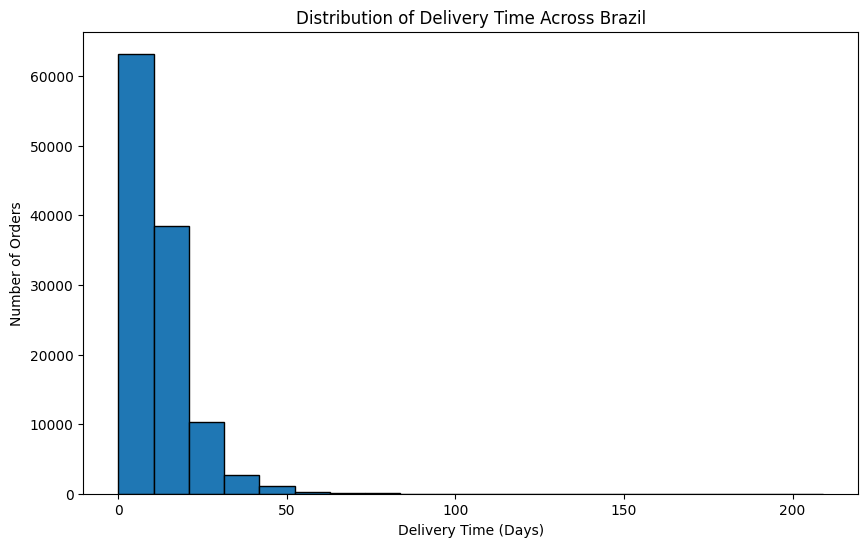

In [41]:
plt.figure(figsize=(10, 6))
plt.hist(all_df['delivery_time_days'].dropna(), bins=20, edgecolor='black')
plt.xlabel('Delivery Time (Days)')
plt.ylabel('Number of Orders')
plt.title('Distribution of Delivery Time Across Brazil')
plt.show()

### Question 2: When Was the Last Purchase Made by Customers in the Past Year?

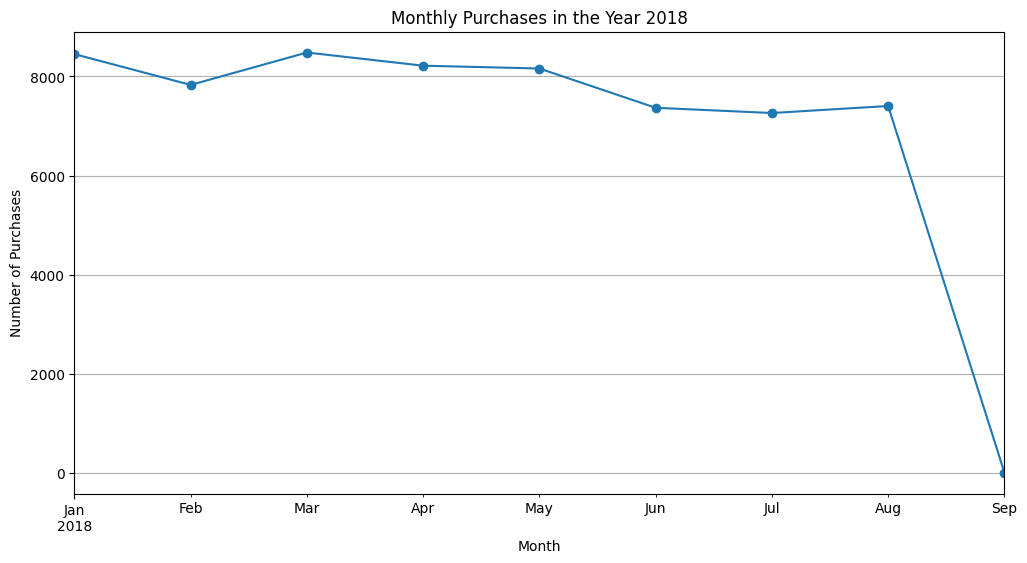

In [42]:
last_year_orders = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]
monthly_orders = last_year_orders.groupby(last_year_orders['order_purchase_timestamp'].dt.to_period('M')).size()

plt.figure(figsize=(12, 6))
monthly_orders.plot(kind='line', marker='o')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Monthly Purchases in the Year 2018')
plt.grid()
plt.show()

### Question 3: How Frequently Did Customers Purchase Products in July, August, and September 2018?

In [43]:
unique_months = all_df['order_purchase_month'].unique()
print("Available months in the data:", unique_months)


Available months in the data: <PeriodArray>
['2017-10', '2018-07', '2018-08', '2017-11', '2018-02', '2017-07', '2017-05',
 '2017-01', '2018-06', '2018-03', '2018-01', '2017-12', '2017-09', '2018-05',
 '2017-08', '2018-04', '2017-03', '2017-06', '2017-02', '2017-04', '2016-10',
 '2016-09', '2016-12', '2018-09']
Length: 24, dtype: period[M]


In [44]:
# Convert 'order_purchase_timestamp' to datetime (if not already done)
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'], errors='coerce')

# Convert 'order_purchase_timestamp' to a monthly period
all_df['order_purchase_month'] = all_df['order_purchase_timestamp'].dt.to_period('M')

# Filter for orders in July, August, and September 2018 using the period format
q3_2018_orders = all_df[all_df['order_purchase_month'].isin(['2018-07', '2018-08', '2018-09'])]

# Ensure the filtered data is correct
print(f"Number of purchases in July, August, and September 2018: {len(q3_2018_orders)}")
print(q3_2018_orders[['customer_id', 'order_purchase_timestamp']].head())


Number of purchases in July, August, and September 2018: 0
Empty DataFrame
Columns: [customer_id, order_purchase_timestamp]
Index: []


In [45]:
# Display unique years and months in the data to cross-check
unique_periods = all_df['order_purchase_month'].unique()
print(f"Unique order months in data: {unique_periods}")

# Try filtering in a more granular way for just the year 2018
orders_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]
print(f"Number of orders in 2018: {len(orders_2018)}")

# Check specific counts for July, August, and September
orders_july_2018 = orders_2018[orders_2018['order_purchase_timestamp'].dt.month == 7]
orders_august_2018 = orders_2018[orders_2018['order_purchase_timestamp'].dt.month == 8]
orders_september_2018 = orders_2018[orders_2018['order_purchase_timestamp'].dt.month == 9]

print(f"Orders in July 2018: {len(orders_july_2018)}")
print(f"Orders in August 2018: {len(orders_august_2018)}")
print(f"Orders in September 2018: {len(orders_september_2018)}")

Unique order months in data: <PeriodArray>
['2017-10', '2018-07', '2018-08', '2017-11', '2018-02', '2017-07', '2017-05',
 '2017-01', '2018-06', '2018-03', '2018-01', '2017-12', '2017-09', '2018-05',
 '2017-08', '2018-04', '2017-03', '2017-06', '2017-02', '2017-04', '2016-10',
 '2016-09', '2016-12', '2018-09']
Length: 24, dtype: period[M]
Number of orders in 2018: 63180
Orders in July 2018: 7262
Orders in August 2018: 7404
Orders in September 2018: 1


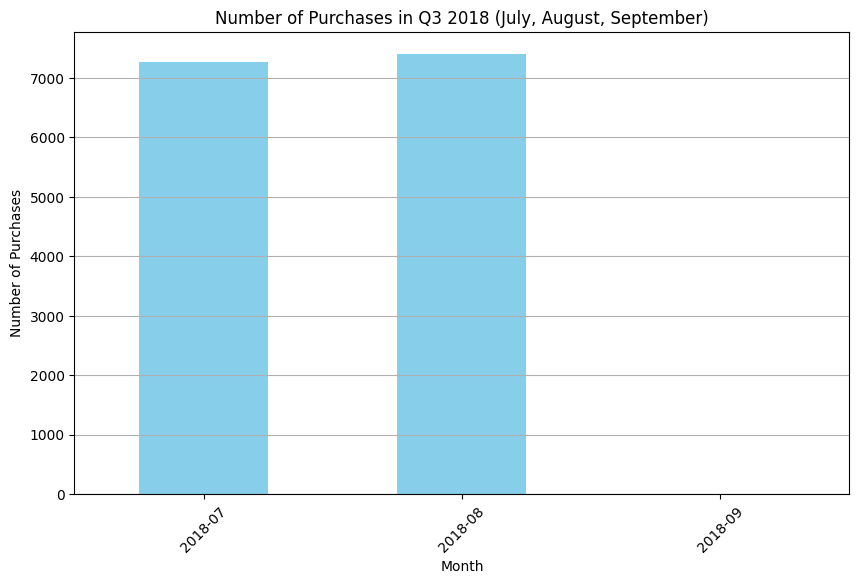

In [46]:
# Combine the filtered data for July, August, and September 2018
combined_q3_2018_orders = pd.concat([orders_july_2018, orders_august_2018, orders_september_2018])

# Plot the number of purchases per month
monthly_orders = combined_q3_2018_orders['order_purchase_month'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases in Q3 2018 (July, August, September)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

### Question 4: What Was the Average Expenditure Per Customer During the Year 2018?

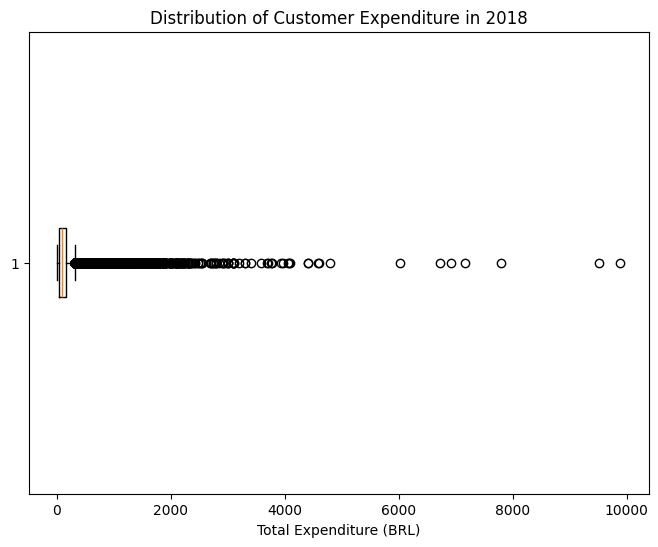

In [47]:
expenditure_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018].groupby('customer_unique_id')['price'].sum()

plt.figure(figsize=(8, 6))
plt.boxplot(expenditure_2018, vert=False)
plt.xlabel('Total Expenditure (BRL)')
plt.title('Distribution of Customer Expenditure in 2018')
plt.show()

### Question 5: Which Regions Have the Highest Number of Purchases?

C:\Users\rayas\AppData\Local\Temp\ipykernel_29440\779694030.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_purchases, x='state', y='total_purchases', palette='viridis')


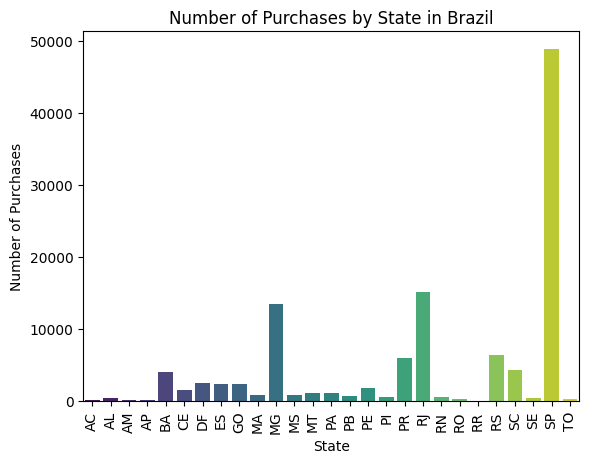

In [48]:
import geopandas as gpd
import seaborn as sns

# Aggregate the number of purchases by state
state_purchases = all_df.groupby('customer_state')['order_id'].count().reset_index()
state_purchases.columns = ['state', 'total_purchases']

# Load shapefile of Brazil (geopandas needed)
# Plot using geodataframe, merging state_purchases
sns.barplot(data=state_purchases, x='state', y='total_purchases', palette='viridis')
plt.xlabel('State')
plt.ylabel('Number of Purchases')
plt.title('Number of Purchases by State in Brazil')
plt.xticks(rotation=90)
plt.show()

### Question 6: How Can Olist Customers Be Segmented Based on the Number of Purchases in a Year?

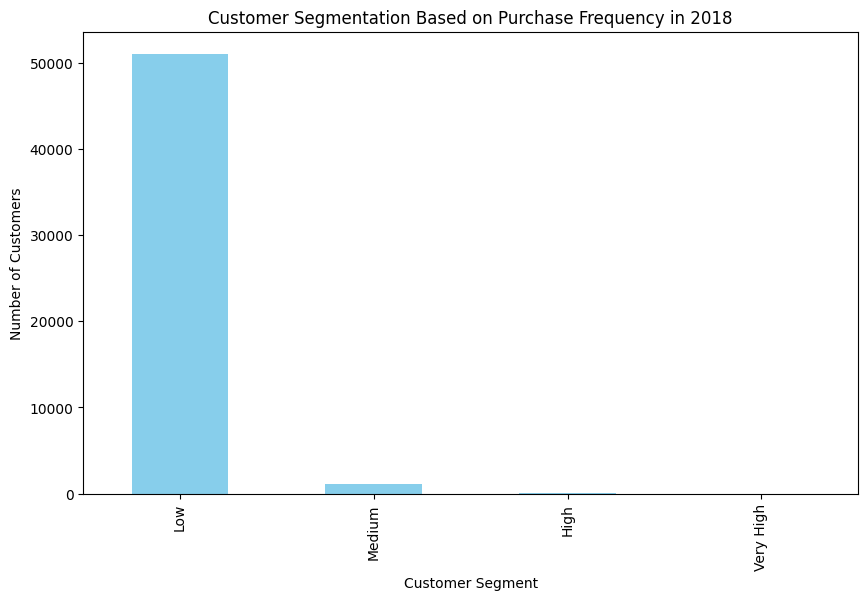

In [49]:
segment_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Customer Segment')
plt.ylabel('Number of Customers')
plt.title('Customer Segmentation Based on Purchase Frequency in 2018')
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2